# Proyecto Ciencia de datos en python

17001455 - Norman Daniel Vicente Orellana

## Configuracion de entorno

In [1]:
import numpy as np

In [2]:
import sklearn
from sklearn import metrics

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

## Cargando el dataset

In [5]:
data = np.load('proyecto_training_data.npy')

## Analisis exploratorio de datos

In [6]:
dim = data.shape 
print('Filas',dim[0],'Columnas', dim[1])

Filas 1460 Columnas 6


## Training data y test data

In [7]:
training_data = data[0:1167]
test_data = data[1168:1460]

In [8]:
print('Training data:',training_data.shape)
print('Test data:',test_data.shape)

Training data: (1167, 6)
Test data: (292, 6)


### Sale price

In [9]:
sales_price = training_data[:,0]

In [10]:
def measures(arr):
    median = np.nanmean(arr)
    min_value = np.nanmin(arr)
    max_value = np.nanmax(arr)
    range = np.ptp(arr)
    desvest = np.nanstd(arr)
    print('Media:',median,'\nValor Max:',max_value,'\nValor Minimo:',min_value,'\nRango:',range,'\nDesviacion estandar:', desvest)

#### Analisis

In [11]:
measures(sales_price)

Media: 180596.78149100256 
Valor Max: 755000.0 
Valor Minimo: 34900.0 
Rango: 720100.0 
Desviacion estandar: 78815.38444724803


<AxesSubplot:ylabel='Count'>

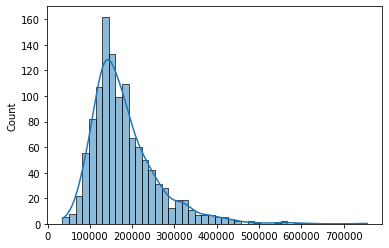

In [12]:
sns.histplot(sales_price,kde=True)

### Overall Quality

In [13]:
overall_qual = training_data[:,1]

#### Analisis

In [14]:
measures(overall_qual)

Media: 6.1011139674378745 
Valor Max: 10.0 
Valor Minimo: 1.0 
Rango: 9.0 
Desviacion estandar: 1.3780220515291879


<AxesSubplot:ylabel='Count'>

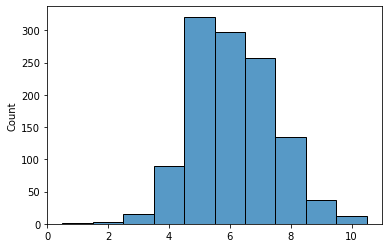

In [15]:
sns.histplot(overall_qual,discrete=True)

### First Floor square feet

In [16]:
first_floor = training_data[:,2]

#### Analisis

In [17]:
measures(first_floor)

Media: 1156.4927163667523 
Valor Max: 3228.0 
Valor Minimo: 334.0 
Rango: 2894.0 
Desviacion estandar: 373.7357021399761


<AxesSubplot:ylabel='Count'>

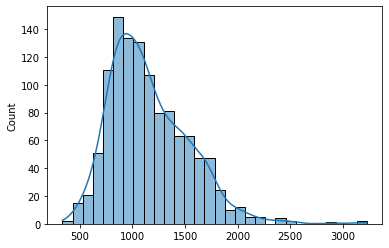

In [18]:
sns.histplot(first_floor,kde=True)

### Total Rooms

In [19]:
total_rooms = training_data[:,3]

#### Analisis

In [20]:
measures(total_rooms)

Media: 6.485004284490146 
Valor Max: 14.0 
Valor Minimo: 2.0 
Rango: 12.0 
Desviacion estandar: 1.6090701501344253


<AxesSubplot:ylabel='Count'>

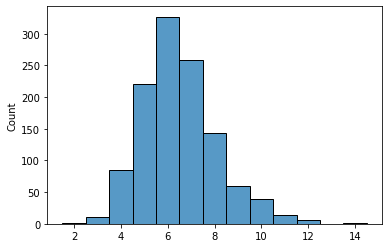

In [21]:
sns.histplot(total_rooms, discrete=True)

#### Observaciones
Existen un dato atipico que es 856

### Year Built

In [22]:
year_built = training_data[:, 4]

#### Analisis

In [23]:
measures(year_built)

Media: 1971.426735218509 
Valor Max: 2010.0 
Valor Minimo: 1875.0 
Rango: 135.0 
Desviacion estandar: 29.940035556112328


<AxesSubplot:ylabel='Count'>

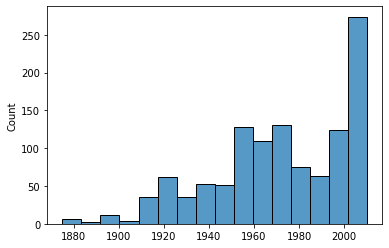

In [24]:
sns.histplot(year_built)

### LotFrontage

In [25]:
lot_frontage =np.nan_to_num(training_data[:, 5], nan=1)

#### Analisis


In [26]:
measures(lot_frontage)

Media: 57.7866323907455 
Valor Max: 313.0 
Valor Minimo: 1.0 
Rango: 312.0 
Desviacion estandar: 33.838594043526456


<AxesSubplot:ylabel='Count'>

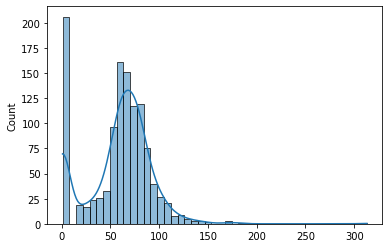

In [27]:
sns.histplot(lot_frontage,kde=True)

#### Observaciones
El arreglo contenia nan's fueron reemplazados por ceros

### Variables independientes

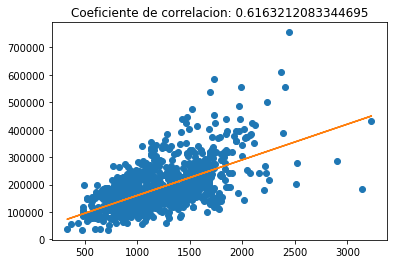

In [28]:
x = first_floor
y = sales_price
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)
r = np.corrcoef(x, y)
plt.title('Coeficiente de correlacion: ' + str(r[1][0]))
plt.show()

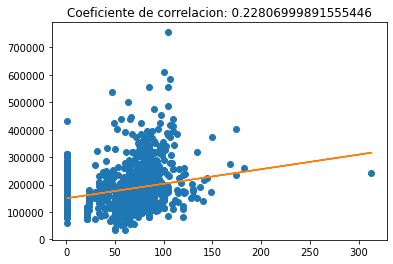

In [29]:
x = lot_frontage
y = sales_price
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

r = np.corrcoef(x, y)
plt.title('Coeficiente de correlacion: ' + str(r[1][0]))
plt.show()

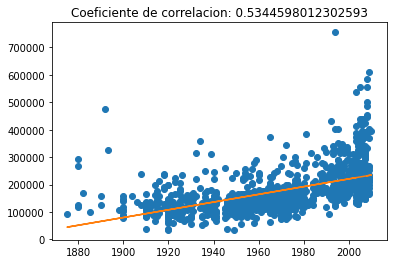

In [30]:
x = year_built
y =  sales_price
plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

r = np.corrcoef(x, y)
plt.title('Coeficiente de correlacion: ' + str(r[1][0]))
plt.show()

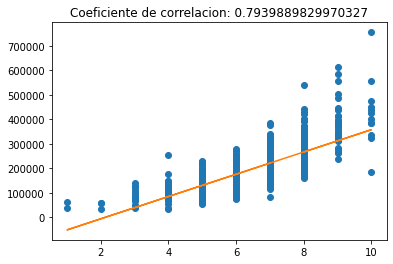

In [31]:
x = overall_qual
y =  sales_price

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

r = np.corrcoef(x, y)
plt.title('Coeficiente de correlacion: ' + str(r[1][0]))
plt.show()

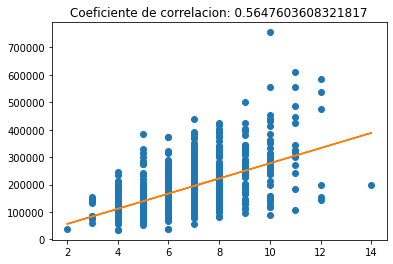

In [32]:
x = total_rooms
y =  sales_price

plt.plot(x, y, 'o')
m, b = np.polyfit(x, y, 1)
plt.plot(x, m*x + b)

r = np.corrcoef(x, y)
plt.title('Coeficiente de correlacion: ' + str(r[1][0]))
plt.show()

## Regresion Lineal (y = mx + b)

In [33]:
#x = np.array([65,80, 68])
#y = np.array([208.5, 181.5, 223.5])
x = np.array(overall_qual, dtype=float)
y = np.array(sales_price, dtype=float)
EPOCHS = 5000
ERROR_CADA = 1
learning_rate = 0.0001
from numpy import inf
def linear_regresion(x,y,EPOCHS, ERROR_CADA, learning_rate):
   #Construimos una matriz apartir de x,y con la segunda columna siendo unos
    x = np.column_stack((x,np.ones_like(x)))
    m = 0
    b = 0
    dic = {}
    errors = []
    for iteration in range(1, EPOCHS + 1):        
        m_b = np.array([m, b])
        #Producto punto: matrix(x, 1) y array(m, b)
        yhat = np.dot(x, m_b)
        error = np.power((y-yhat),2)/2
        average_error = np.mean(error)
        # Gradient array m, b
        gradient =  np.array([ np.mean((yhat - y)*x[:,0]), np.mean((yhat - y)*x[:,1]) ])  
        m = m - learning_rate * gradient[0]
        b = b - learning_rate * gradient[1]
        m_b=[m, b]
        errors.append(average_error)
        dic[iteration] = m_b
    return dic, errors, yhat

(dic, errors, yhat) = linear_regresion(x,y,EPOCHS, ERROR_CADA, learning_rate)

## Visualizacion en tiempo real del Error

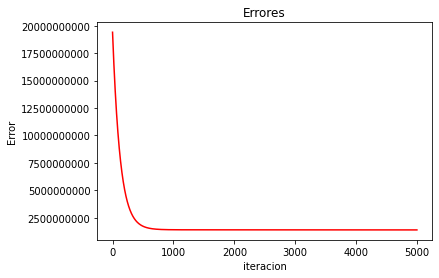

In [34]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
#ax = fig.add_subplot(111) 
ax.plot(errors ,color="r") 
ax.ticklabel_format(style='plain')
ax.set_xlabel('iteracion')
ax.set_ylabel('Error')
ax.set_title('Errores')

plt.show()

## Entrenamiento del modelo

In [35]:
def model_train(dic, n):
    x =[]
    y = []
    for iteracion in range(n, len(dic)+1, n):
        m = dic.get(iteracion)[0]
        b = dic.get(iteracion)[1]
        x.append(m)
        y.append(b)
    x = np.array(x)
    y = np.array(y)
    #print(x,y)
    plt.plot(x, y, 'o')
    m, b = np.polyfit(x, y, 1)
    plt.plot(x, m*x + b)

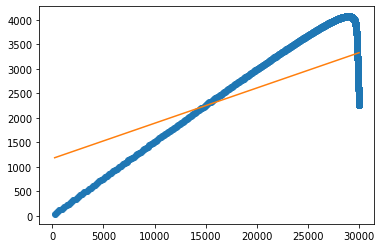

In [36]:
model_train(dic, 2)

In [37]:
def sklearn_pred():
    from sklearn.linear_model import LinearRegression
    X = np.array(overall_qual, dtype=float).reshape(-1, 1) 
    y = np.array(sales_price, dtype=float).reshape(-1, 1) 
    reg = LinearRegression().fit(X, y)
   # print(reg.score(X, y))
    return reg.predict(X)

In [38]:
def prediccion_modelos(n):
    mean = (sklearn_pred()[0:n] + yhat[0:n].reshape(n, 1))/2
    return  yhat[0:n], sklearn_pred()[0:n], mean

In [39]:
(prediccion_iterativo, prediccion_sklearn, prediccion_promedio)= prediccion_modelos(10)

In [40]:
prediccion_iterativo, prediccion_sklearn, prediccion_promedio

(array([212238.77719284, 182241.73626092, 212238.77719284, 212238.77719284,
        242235.81812476, 152244.695329  , 242235.81812476, 212238.77719284,
        212238.77719284, 152244.695329  ]),
 array([[221416.86976288],
        [176005.0079771 ],
        [221416.86976288],
        [221416.86976288],
        [266828.73154865],
        [130593.14619133],
        [266828.73154865],
        [221416.86976288],
        [221416.86976288],
        [130593.14619133]]),
 array([[216827.82347786],
        [179123.37211901],
        [216827.82347786],
        [216827.82347786],
        [254532.27483671],
        [141418.92076017],
        [254532.27483671],
        [216827.82347786],
        [216827.82347786],
        [141418.92076017]]))

## Datos de validacion (20%)

### Variable dependiente

In [41]:
sales_price_test = test_data[:,0]

### Prediccion del modelo iterativo, sklearn y promedio de ambos

### Variable independiente

In [42]:
overall_qual_test = test_data[:,1]
year_built_test = test_data[:,2]

### Error promedio modelo Iterativo

In [43]:
x = np.array(overall_qual_test, dtype=float)
y = np.array(sales_price_test, dtype=float)
EPOCHS = 8000
ERROR_CADA = 1
learning_rate = 0.0001
(dic_train, errores_train, yhat_train) = linear_regresion(x,y,EPOCHS, ERROR_CADA, learning_rate)
error_promedio_iterativo =  np.mean(errores_train)

In [44]:
print(error_promedio_iterativo)

1842053546.2589228


### Error promedio Sklearn

In [45]:
from sklearn.metrics import mean_squared_error
error_promedio_sklearn = mean_squared_error(y, yhat_train)
print(error_promedio_sklearn)

3089900074.463211


### Grafica de errores

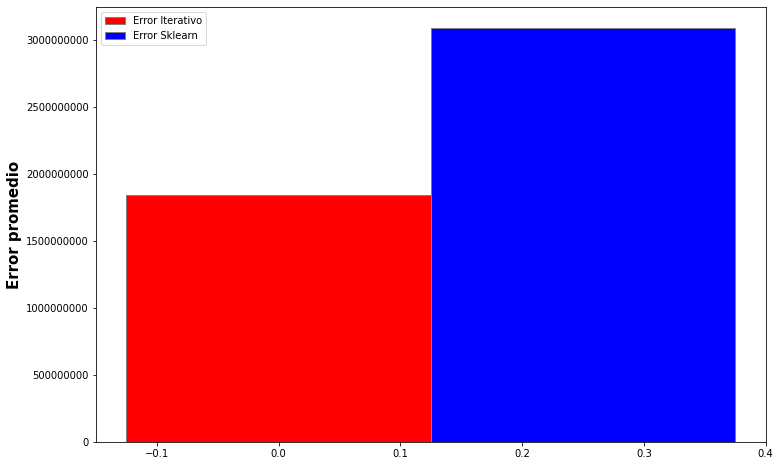

In [48]:
# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))
IT = [1]
br1 = np.arange(len(IT))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
 
# Make the plot
plt.bar(br1, error_promedio_iterativo, color ='r', width = barWidth,
        edgecolor ='grey', label ='Error Iterativo')
plt.bar(br2, error_promedio_sklearn, color ='b', width = barWidth,
        edgecolor ='grey', label ='Error Sklearn')
plt.ticklabel_format(style='plain')
# Adding Xticks
plt.xlabel('', fontweight ='bold', fontsize = 15)
plt.ylabel('Error promedio', fontweight ='bold', fontsize = 15)

plt.legend()
plt.show()

### Conclusiones

- Segun el analisis exploratorio de decidio trabajar con las variables overall_qual, sales_price
- Para la funcion que se creo prediccion_modelos se puede observar como los modelos se comportan en cuanto a la prediccion
- Para el error se creo una funcion que devuelve el error promedio de cada modelo en la grafica se puede observar el que el modelo iterativo despues de 8000 iteraciones es el que tiene el error mas bajo
- La grafica de error en el tiempo llega un punto donde se estabiliza 
- Se recomienda utilizar el modelo iterativo ya que es el que presenta un error promedio mas bajo